<a href="https://colab.research.google.com/github/blessjal/blessjal/blob/main/Ar_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [241]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier


In [242]:
import pandas as pd
import matplotlib.pyplot as plt


In [243]:
df = pd.read_excel('/content/Breast_Cancer_Trimmed.xlsx')

In [244]:
df.head()

,DateofDiagnosis,AgeatDiagnosis,Race,Sex,PrimarySite,TNMClinStageGroup,TNMPathStageGroup,RXSummSurgeryofPrimarySite,RXSummChemotherapy,RXSummRadiation,...,CoronaryArt_414xx,AlcoDrugAbuse_305xx,LipidsCholest_272xx,Esophageal_530xx,HeartArrhythmias_427xx,Respiratory1_786xx,Anemias_285xx,ElectrolytesFluids_276xx,Respiratory2_518xx,HeartFailures_428xx
0,2000/01/01,78,1,2,C509,99,99,0.0,99,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2000/01/01,88,1,2,C509,99,99,51.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2000/01/02,76,1,2,C502,1,1,22.0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,2000/01/02,72,1,2,C501,1,1,22.0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,2000/01/03,86,2,2,C506,2B,3B,50.0,3,0.0,...,0,0,0,0,0,0,0,0,0,0


In [251]:
df = df[df['BestStage'] !='Dx<2004']

In [256]:
df.BestStage

2              I
3              I
4           IIIB
5              I
6           IIIA
          ...   
24304         IA
24305         IA
24306         IA
24307         IA
24308    UNKNOWN
Name: BestStage, Length: 23965, dtype: object

In [257]:
tmp = []
for i in df.BestStage:
    if i == 'IIA' or i == 'IIB':
        tmp.append(2)
    elif i == 'IIIA' or i == 'IIIB'or i == 'IIIC':
        
        tmp.append(3)
    elif i == 'IVA' or i == 'IVB' or i== 'IVC':
        
        tmp.append(4)
    elif i == 'IA' or i == 'IB' or i == 'IB1' or i == 'IB2' or i == 'IA2' or i == 'IC':
       
        tmp.append(1)
    elif i == '0is':
        
        tmp.append(0)

In [259]:
df.BestStage.head()


2       I
3       I
4    IIIB
5       I
6    IIIA
Name: BestStage, dtype: object

In [248]:
TMP = []
for i in df['BestStage']:
    if i == 'I':
        i = 1
        TMP.append(1)
    elif i == 'II':
        i = 2
        TMP.append(2)
    elif i == 'III':
        i = 3
        TMP.append(3)
    elif i == 'IV':
        i = 4
        TMP.append(4)
    elif i == 'UKW':
        i = 99
        TMP.append(99)
    else:
        i = 0
        TMP.append(0)

In [249]:
TMP

[0,
 0,
 1,
 1,
 0,
 1,
 0,
 4,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 4,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 4,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 4,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 4,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 4,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 4,
 0,
 1,
 1,
 4,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 4,
 4,
 1,
 1,
 1,
 0,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 4,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,


In [212]:
df.columns

Index(['DateofDiagnosis', 'AgeatDiagnosis', 'Race', 'Sex', 'PrimarySite',
       'TNMClinStageGroup', 'TNMPathStageGroup', 'RXSummSurgeryofPrimarySite',
       'RXSummChemotherapy', 'RXSummRadiation', 'VitalStatus',
       'DateofLastContactDeath', 'ComorbidityComplication1',
       'ComorbidityComplication2', 'ComorbidityComplication3',
       'ComorbidityComplication4', 'ComorbidityComplication5',
       'ComorbidityComplication6', 'ComorbidityComplication7',
       'ComorbidityComplication8', 'ComorbidityComplication9',
       'ComorbidityComplication10', 'age_Dx', 'deadflag', 'date_Dx',
       'Date_Death', 'Date_LastC', 'Year_Dx', 'Years_OS', 'Days_OS',
       'BestStage', 'number_comorbids', 'Hypertension_401xx', 'Diabetes_250xx',
       'AirwayObstruct_496', 'CoronaryArt_414xx', 'AlcoDrugAbuse_305xx',
       'LipidsCholest_272xx', 'Esophageal_530xx', 'HeartArrhythmias_427xx',
       'Respiratory1_786xx', 'Anemias_285xx', 'ElectrolytesFluids_276xx',
       'Respiratory2_518xx', '

In [213]:
df = df[[ 'AgeatDiagnosis', 'Race', 'Sex', 'PrimarySite',
        'RXSummSurgeryofPrimarySite',
       'RXSummChemotherapy', 'RXSummRadiation', 'VitalStatus',
       'ComorbidityComplication1',
       'ComorbidityComplication2', 'ComorbidityComplication3',
       'ComorbidityComplication4', 'ComorbidityComplication5',
       'ComorbidityComplication6', 'ComorbidityComplication7',
       'ComorbidityComplication8', 'ComorbidityComplication9',
       'ComorbidityComplication10', 
        'Year_Dx', 'Years_OS', 'Days_OS',
       'BestStage', 'number_comorbids', 'Hypertension_401xx', 'Diabetes_250xx',
       'AirwayObstruct_496', 'CoronaryArt_414xx', 'AlcoDrugAbuse_305xx',
       'LipidsCholest_272xx', 'Esophageal_530xx', 'HeartArrhythmias_427xx',
       'Respiratory1_786xx', 'Anemias_285xx', 'ElectrolytesFluids_276xx',
       'Respiratory2_518xx', 'HeartFailures_428xx']]

In [214]:
df.columns

Index(['AgeatDiagnosis', 'Race', 'Sex', 'PrimarySite',
       'RXSummSurgeryofPrimarySite', 'RXSummChemotherapy', 'RXSummRadiation',
       'VitalStatus', 'ComorbidityComplication1', 'ComorbidityComplication2',
       'ComorbidityComplication3', 'ComorbidityComplication4',
       'ComorbidityComplication5', 'ComorbidityComplication6',
       'ComorbidityComplication7', 'ComorbidityComplication8',
       'ComorbidityComplication9', 'ComorbidityComplication10', 'Year_Dx',
       'Years_OS', 'Days_OS', 'BestStage', 'number_comorbids',
       'Hypertension_401xx', 'Diabetes_250xx', 'AirwayObstruct_496',
       'CoronaryArt_414xx', 'AlcoDrugAbuse_305xx', 'LipidsCholest_272xx',
       'Esophageal_530xx', 'HeartArrhythmias_427xx', 'Respiratory1_786xx',
       'Anemias_285xx', 'ElectrolytesFluids_276xx', 'Respiratory2_518xx',
       'HeartFailures_428xx'],
      dtype='object')

In [215]:

df['Year_Dx'] = pd. to_datetime(df['Year_Dx'],format='%Y')
df['Year_Dx'] = pd. DatetimeIndex(df['Year_Dx']). year

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24309 entries, 0 to 24308
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AgeatDiagnosis              24309 non-null  int64  
 1   Race                        24309 non-null  int64  
 2   Sex                         24309 non-null  int64  
 3   PrimarySite                 24309 non-null  object 
 4   RXSummSurgeryofPrimarySite  24308 non-null  float64
 5   RXSummChemotherapy          24309 non-null  int64  
 6   RXSummRadiation             23483 non-null  float64
 7   VitalStatus                 24309 non-null  int64  
 8   ComorbidityComplication1    24309 non-null  object 
 9   ComorbidityComplication2    4669 non-null   object 
 10  ComorbidityComplication3    2959 non-null   object 
 11  ComorbidityComplication4    1888 non-null   object 
 12  ComorbidityComplication5    1177 non-null   object 
 13  ComorbidityComplication6    735

In [217]:
df1 = df[[ 'AgeatDiagnosis', 'Race', 'Sex', 'PrimarySite',
        'RXSummSurgeryofPrimarySite',
       'RXSummChemotherapy', 'RXSummRadiation', 'VitalStatus',
       'Year_Dx', 'Days_OS',
       'BestStage', 'number_comorbids']]

In [218]:
df1.head()

,AgeatDiagnosis,Race,Sex,PrimarySite,RXSummSurgeryofPrimarySite,RXSummChemotherapy,RXSummRadiation,VitalStatus,Year_Dx,Days_OS,BestStage,number_comorbids
0,78,1,2,C509,0.0,99,0.0,0,2000,1689,Dx<2004,0
1,88,1,2,C509,51.0,0,0.0,0,2000,2576,Dx<2004,0
2,76,1,2,C502,22.0,0,1.0,1,2000,5477,I,0
3,72,1,2,C501,22.0,0,1.0,1,2000,5477,I,0
4,86,2,2,C506,50.0,3,0.0,0,2000,1890,IIIB,0


In [12]:
df1.corr()

,AgeatDiagnosis,Race,Sex,RXSummSurgeryofPrimarySite,RXSummChemotherapy,RXSummRadiation,VitalStatus,Year_Dx,Days_OS,number_comorbids
AgeatDiagnosis,1.000000,-0.120583,NaN,-0.051721,0.063062,-0.016875,-0.273904,0.016110,-0.192405,0.112111
Race,-0.120583,1.000000,NaN,-0.006944,-0.020808,0.004642,-0.040278,0.027073,-0.059457,0.055397
Sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RXSummSurgeryofPrimarySite,-0.051721,-0.006944,NaN,1.000000,0.142267,-0.023266,0.029247,-0.015018,0.038363,0.003228
RXSummChemotherapy,0.063062,-0.020808,NaN,0.142267,1.000000,0.367333,-0.023718,0.035579,-0.053502,-0.029689
RXSummRadiation,-0.016875,0.004642,NaN,-0.023266,0.367333,1.000000,-0.001130,-0.047650,0.032933,-0.085352
VitalStatus,-0.273904,-0.040278,NaN,0.029247,-0.023718,-0.001130,1.000000,0.286133,0.336815,-0.025397
Year_Dx,0.016110,0.027073,NaN,-0.015018,0.035579,-0.047650,0.286133,1.000000,-0.686161,0.275735
Days_OS,-0.192405,-0.059457,NaN,0.038363,-0.053502,0.032933,0.336815,-0.686161,1.000000,-0.245823
number_comorbids,0.112111,0.055397,NaN,0.003228,-0.029689,-0.085352,-0.025397,0.275735,-0.245823,1.000000


In [219]:
X.head(10)

,AgeatDiagnosis,Race,Sex,RXSummSurgeryofPrimarySite,RXSummChemotherapy,RXSummRadiation,Year_Dx,Days_OS,BestStage,number_comorbids
2,76,1,2,22.0,0,1.0,2000,5477,I,0
3,72,1,2,22.0,0,1.0,2000,5477,I,0
4,86,2,2,50.0,3,0.0,2000,1890,III,0
5,93,1,2,51.0,0,0.0,2000,2544,I,0
6,50,1,2,51.0,3,0.0,2000,2786,III,0
7,70,1,2,90.0,2,0.0,2000,2805,IV,0
8,75,1,2,54.0,3,0.0,2000,3029,II,0
9,45,2,2,51.0,0,0.0,2000,5476,III,0
10,41,1,2,22.0,3,1.0,2000,5476,II,0
11,60,1,2,40.0,0,0.0,2000,5475,I,0


In [220]:
df['Race'].value_counts()

1    21487
2     2822
Name: Race, dtype: int64

In [221]:
df1['BestStage'].value_counts()

I          7580
IIA        5555
IA         3099
IIB        2502
IIIA       1313
IV         1236
UNKNOWN     974
IIIB        750
IIIC        443
Dx<2004     344
0           176
IB          133
II           72
IC           18
IIINOS       17
III          16
0is           2
IVB           2
IA2           1
IB1           1
IVA           1
Name: BestStage, dtype: int64

In [222]:
df1 = df1[df1['BestStage'] !='Dx<2004']

In [223]:
df1['BestStage'].value_counts()

I          7580
IIA        5555
IA         3099
IIB        2502
IIIA       1313
IV         1236
UNKNOWN     974
IIIB        750
IIIC        443
0           176
IB          133
II           72
IC           18
IIINOS       17
III          16
0is           2
IVB           2
IA2           1
IB1           1
IVA           1
Name: BestStage, dtype: int64

In [225]:
df1['BestStage'] = df1["BestStage"].str.replace("[ABC12NOSis]","")
      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [226]:
df1['BestStage'].value_counts()

I      10832
II      8129
III     2539
IV      1239
UKW      974
0          2
Name: BestStage, dtype: int64

In [227]:
df1.head()

,AgeatDiagnosis,Race,Sex,PrimarySite,RXSummSurgeryofPrimarySite,RXSummChemotherapy,RXSummRadiation,VitalStatus,Year_Dx,Days_OS,BestStage,number_comorbids
2,76,1,2,C502,22.0,0,1.0,1,2000,5477,I,0
3,72,1,2,C501,22.0,0,1.0,1,2000,5477,I,0
4,86,2,2,C506,50.0,3,0.0,0,2000,1890,III,0
5,93,1,2,C504,51.0,0,0.0,0,2000,2544,I,0
6,50,1,2,C504,51.0,3,0.0,0,2000,2786,III,0


In [228]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23965 entries, 2 to 24308
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AgeatDiagnosis              23965 non-null  int64  
 1   Race                        23965 non-null  int64  
 2   Sex                         23965 non-null  int64  
 3   PrimarySite                 23965 non-null  object 
 4   RXSummSurgeryofPrimarySite  23964 non-null  float64
 5   RXSummChemotherapy          23965 non-null  int64  
 6   RXSummRadiation             23143 non-null  float64
 7   VitalStatus                 23965 non-null  int64  
 8   Year_Dx                     23965 non-null  int64  
 9   Days_OS                     23965 non-null  int64  
 10  BestStage                   23715 non-null  object 
 11  number_comorbids            23965 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 2.4+ MB


In [229]:
df1['RXSummChemotherapy'] = df1['RXSummChemotherapy'].astype('object')
df1['RXSummSurgeryofPrimarySite'] = df1['RXSummSurgeryofPrimarySite'].astype('object')
df1['RXSummRadiation'] = df1['RXSummRadiation'].astype('object')
df1['Year_Dx'] = df1['Year_Dx'].astype('object')

In [230]:
# df1['Year_Dx'] = pd. to_datetime(df1['Year_Dx'],format='%Y')
df1['Year_Dx'] = pd. DatetimeIndex(df1['Year_Dx']). year

In [25]:
df1.to_csv('Breast_Cancer_ML_Data.xlsx')

In [231]:
df1.head()

,AgeatDiagnosis,Race,Sex,PrimarySite,RXSummSurgeryofPrimarySite,RXSummChemotherapy,RXSummRadiation,VitalStatus,Year_Dx,Days_OS,BestStage,number_comorbids
2,76,1,2,C502,22.0,0,1.0,1,1970,5477,I,0
3,72,1,2,C501,22.0,0,1.0,1,1970,5477,I,0
4,86,2,2,C506,50.0,3,0.0,0,1970,1890,III,0
5,93,1,2,C504,51.0,0,0.0,0,1970,2544,I,0
6,50,1,2,C504,51.0,3,0.0,0,1970,2786,III,0


In [237]:
TMP

[1,
 1,
 3,
 1,
 3,
 4,
 2,
 3,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 3,
 4,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 2,
 3,
 1,
 2,
 3,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 3,
 4,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 4,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 4,
 1,
 2,
 3,
 1,
 1,
 2,
 2,
 4,
 3,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 3,
 2,
 1,
 4,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 4,
 2,
 1,
 1,
 4,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 4,
 4,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 3,
 1,
 4,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 3,
 2,
 3,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 3,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 4,
 2,
 3,
 2,
 1,
 2,
 1,
 1,
 2,
 1,


In [238]:
s = pd.Series(TMP)
s = pd.DataFrame(s)
s

,0
0,1
1,1
2,3
3,1
4,3
...,...
23960,1
23961,1
23962,1
23963,1


In [239]:
Df2 = df1.join(s)

In [240]:
Df2.head()

,AgeatDiagnosis,Race,Sex,PrimarySite,RXSummSurgeryofPrimarySite,RXSummChemotherapy,RXSummRadiation,VitalStatus,Year_Dx,Days_OS,BestStage,number_comorbids,0
2,76,1,2,C502,22.0,0,1.0,1,1970,5477,I,0,3.0
3,72,1,2,C501,22.0,0,1.0,1,1970,5477,I,0,1.0
4,86,2,2,C506,50.0,3,0.0,0,1970,1890,III,0,3.0
5,93,1,2,C504,51.0,0,0.0,0,1970,2544,I,0,4.0
6,50,1,2,C504,51.0,3,0.0,0,1970,2786,III,0,2.0


In [201]:
df1['FinalStage']

2        3.0
3        1.0
4        3.0
5        4.0
6        2.0
        ... 
24304    NaN
24305    NaN
24306    NaN
24307    NaN
24308    NaN
Name: FinalStage, Length: 23965, dtype: float64

In [159]:
df1.head()

,AgeatDiagnosis,Race,Sex,PrimarySite,RXSummSurgeryofPrimarySite,RXSummChemotherapy,RXSummRadiation,VitalStatus,Year_Dx,Days_OS,BestStage,number_comorbids,FinalStage
2,76,1,2,C502,22.0,0,1.0,1,2000,5477,3.0,0,3.0
3,72,1,2,C501,22.0,0,1.0,1,2000,5477,1.0,0,1.0
4,86,2,2,C506,50.0,3,0.0,0,2000,1890,3.0,0,3.0
5,93,1,2,C504,51.0,0,0.0,0,2000,2544,4.0,0,4.0
6,50,1,2,C504,51.0,3,0.0,0,2000,2786,2.0,0,2.0


In [146]:
df1.BestStage.value_counts()


I      10832
II      8129
III     2539
IV      1239
UKW      974
0          2
Name: BestStage, dtype: int64

In [ ]:
df1['BestStage'] = [x for x in df1['BestStage']]

In [139]:
df1.head()

,AgeatDiagnosis,Race,Sex,PrimarySite,RXSummSurgeryofPrimarySite,RXSummChemotherapy,RXSummRadiation,VitalStatus,Year_Dx,Days_OS,BestStage,number_comorbids
2,76,1,2,C502,22.0,0,1.0,1,2000,5477,I,0
3,72,1,2,C501,22.0,0,1.0,1,2000,5477,I,0
4,86,2,2,C506,50.0,3,0.0,0,2000,1890,III,0
5,93,1,2,C504,51.0,0,0.0,0,2000,2544,I,0
6,50,1,2,C504,51.0,3,0.0,0,2000,2786,III,0


In [104]:
X = df1.drop(['VitalStatus'], axis=1)
y = df1['VitalStatus']

X.shape, y.shape

((23965, 11), (23965,))

In [105]:
df1['Year_Dx'].value_counts()

2013    1965
2007    1784
2011    1775
2012    1769
2009    1756
2002    1736
2010    1728
2006    1708
2001    1661
2008    1635
2000    1630
2005    1628
2004    1616
2003    1574
Name: Year_Dx, dtype: int64

In [106]:
for col_name in X.columns:
    if df1[col_name].dtypes == 'object':
        num_categories = len(df1[col_name].unique())
        print("feature '{col_name}' has '{num_categories}' unique categories".format(col_name=col_name, num_categories=num_categories))

feature 'PrimarySite' has '9' unique categories
feature 'RXSummSurgeryofPrimarySite' has '49' unique categories
feature 'RXSummChemotherapy' has '10' unique categories
feature 'RXSummRadiation' has '10' unique categories
feature 'BestStage' has '7' unique categories


In [107]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23965 entries, 2 to 24308
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   AgeatDiagnosis              23965 non-null  int64 
 1   Race                        23965 non-null  int64 
 2   Sex                         23965 non-null  int64 
 3   PrimarySite                 23965 non-null  object
 4   RXSummSurgeryofPrimarySite  23964 non-null  object
 5   RXSummChemotherapy          23965 non-null  object
 6   RXSummRadiation             23143 non-null  object
 7   Year_Dx                     23965 non-null  int64 
 8   Days_OS                     23965 non-null  int64 
 9   BestStage                   23715 non-null  object
 10  number_comorbids            23965 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 2.7+ MB


In [ ]:
X = X.drop('PrimarySite', axis=1)

In [109]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(y)

In [110]:
df1['Year_Dx'] = df1['Year_Dx'].astype('object')

In [117]:
num_features = [ 'AgeatDiagnosis', 'Days_OS',
        'number_comorbids', 'Race', 'Sex' ]

cat_features = [ 'BestStage', 'RXSummSurgeryofPrimarySite', 'RXSummChemotherapy', 'RXSummRadiation', 'Year_Dx']

In [112]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23965 entries, 2 to 24308
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   AgeatDiagnosis              23965 non-null  int64 
 1   Race                        23965 non-null  int64 
 2   Sex                         23965 non-null  int64 
 3   RXSummSurgeryofPrimarySite  23964 non-null  object
 4   RXSummChemotherapy          23965 non-null  object
 5   RXSummRadiation             23143 non-null  object
 6   Year_Dx                     23965 non-null  int64 
 7   Days_OS                     23965 non-null  int64 
 8   BestStage                   23715 non-null  object
 9   number_comorbids            23965 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 2.5+ MB


In [118]:
preprocessor = ColumnTransformer([('numerical', 'passthrough', num_features),
                                  ('categorical', OneHotEncoder(sparse=False, handle_unknown='ignore'), cat_features)])

In [119]:
# Logistic Regression Model
lr_model = Pipeline([('preprocessor', preprocessor ), 
                     ('model', LogisticRegression(class_weight='balanced', solver='liblinear'))])

# Decision Tree Model
dt_model = Pipeline([('preprocessor', preprocessor ), 
                     ('model', DecisionTreeClassifier(class_weight='balanced'))])

# Random Forest Model
rf_model = Pipeline([('preprocessor', preprocessor ), 
                     ('model', RandomForestClassifier(class_weight='balanced', n_estimators=100))])

# XGB model
xgb_model = Pipeline([('preprocessor', preprocessor ), 
                     ('model', XGBClassifier(scale_pos_weight=(1 - y.mean()), n_jobs=-1))])

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [121]:
params = {"model__C": [1, 1.3, 1.5]}
gs = GridSearchCV(lr_model, param_grid=params, n_jobs=-1, cv=5, scoring='accuracy')
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         'passthrough',
                                                                         ['AgeatDiagnosis',
                                                                          'Days_OS',
                                                                          'number_comorbids',
                                                                          'Race',
                                                                          'Sex']),
                                                                        ('categorical',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
             

In [122]:
print(gs.best_params_)
print(gs.best_score_)

{'model__C': 1.5}
0.9639940387481373


In [123]:
lr_model.set_params(**gs.best_params_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', 'passthrough',
                                                  ['AgeatDiagnosis', 'Days_OS',
                                                   'number_comorbids', 'Race',
                                                   'Sex']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['BestStage',
                                                   'RXSummSurgeryofPrimarySite',
                                                   'RXSummChemotherapy',
                                                   'RXSummRadiation',
                                                   'Year_Dx'])])),
                ('model',
                 LogisticRegression(C=1.5, class_weight=

In [124]:
lr_model.get_params('model')

{'memory': None,
 'model': LogisticRegression(C=1.5, class_weight='balanced', solver='liblinear'),
 'model__C': 1.5,
 'model__class_weight': 'balanced',
 'model__dual': False,
 'model__fit_intercept': True,
 'model__intercept_scaling': 1,
 'model__l1_ratio': None,
 'model__max_iter': 100,
 'model__multi_class': 'auto',
 'model__n_jobs': None,
 'model__penalty': 'l2',
 'model__random_state': None,
 'model__solver': 'liblinear',
 'model__tol': 0.0001,
 'model__verbose': 0,
 'model__warm_start': False,
 'preprocessor': ColumnTransformer(transformers=[('numerical', 'passthrough',
                                  ['AgeatDiagnosis', 'Days_OS',
                                   'number_comorbids', 'Race', 'Sex']),
                                 ('categorical',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  ['BestStage', 'RXSummSurgeryofPrimarySite',
                  

In [125]:
lr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', 'passthrough',
                                                  ['AgeatDiagnosis', 'Days_OS',
                                                   'number_comorbids', 'Race',
                                                   'Sex']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['BestStage',
                                                   'RXSummSurgeryofPrimarySite',
                                                   'RXSummChemotherapy',
                                                   'RXSummRadiation',
                                                   'Year_Dx'])])),
                ('model',
                 LogisticRegression(C=1.5, class_weight=

In [126]:
y_pred = lr_model.predict(X_test)

In [127]:
accuracy_score(y_test, y_pred)

0.9670375521557719

In [128]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      2125
           1       0.96      0.99      0.98      5065

    accuracy                           0.97      7190
   macro avg       0.97      0.95      0.96      7190
weighted avg       0.97      0.97      0.97      7190



In [129]:
dt_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', 'passthrough',
                                                  ['AgeatDiagnosis', 'Days_OS',
                                                   'number_comorbids', 'Race',
                                                   'Sex']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['BestStage',
                                                   'RXSummSurgeryofPrimarySite',
                                                   'RXSummChemotherapy',
                                                   'RXSummRadiation',
                                                   'Year_Dx'])])),
                ('model', DecisionTreeClassifier(class_weight='balanced'))])

In [130]:
dt_pred = dt_model.predict(X_test)

In [131]:
dt_score = accuracy_score(y_test, dt_pred)
dt_score

0.9673157162726008

In [132]:
rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', 'passthrough',
                                                  ['AgeatDiagnosis', 'Days_OS',
                                                   'number_comorbids', 'Race',
                                                   'Sex']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['BestStage',
                                                   'RXSummSurgeryofPrimarySite',
                                                   'RXSummChemotherapy',
                                                   'RXSummRadiation',
                                                   'Year_Dx'])])),
                ('model', RandomForestClassifier(class_weight='balanced'))])

In [133]:
rf_pred = rf_model.predict(X_test)

In [134]:
rf_score = accuracy_score(y_test, rf_pred)
rf_score

0.9618915159944367

In [135]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

rf.feature_importances_

ValueError: ignored

In [101]:
X.head()

,AgeatDiagnosis,Race,Sex,RXSummSurgeryofPrimarySite,RXSummChemotherapy,RXSummRadiation,Year_Dx,Days_OS,BestStage,number_comorbids
2,76,1,2,22.0,0,1.0,2000-01-01,5477,I,0
3,72,1,2,22.0,0,1.0,2000-01-01,5477,I,0
4,86,2,2,50.0,3,0.0,2000-01-01,1890,III,0
5,93,1,2,51.0,0,0.0,2000-01-01,2544,I,0
6,50,1,2,51.0,3,0.0,2000-01-01,2786,III,0


In [ ]:
xgb_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', 'passthrough',
                                                  ['AgeatDiagnosis', 'Days_OS',
                                                   'number_comorbids', 'Race',
                                                   'Sex']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['PrimarySite', 'BestStage',
                                                   'RXSummSurgeryofPrimarySite',
                                                   'RXSummChemotherapy',
                                                   'RXSummRadiation',
                                                   'Year_Dx'])])),
                ('model',
                 XGBClassifier(n_jobs=-1,

In [ ]:
xgb_pred = xgb_model.predict(X_test)

In [ ]:
xgb_score = accuracy_score(y_test, xgb_pred)
xgb_score

0.9794158553546592

In [ ]:
pip install eli5


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import eli5

In [ ]:
eli5.show_weights(lr_model.named_steps['model'])

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 6.1 MB/s 


In [ ]:
import shap
shap.initjs()

In [ ]:
explainer = shap.TreeExplainer(xgb_model.named_steps['model'], feature_names=all_features)

In [ ]:
explainer

In [ ]:
ohe_categories = preprocessor.named_transformers_['categorical'].categories_

In [ ]:
new_ohe_features = [f'{col}__{val}' for col, vals in zip(cat_features, ohe_categories) for val in vals ]

In [ ]:
all_features = num_features + new_ohe_features

In [ ]:
all_features

['AgeatDiagnosis',
 'Days_OS',
 'number_comorbids',
 'Race',
 'Sex',
 'PrimarySite__C500',
 'PrimarySite__C501',
 'PrimarySite__C502',
 'PrimarySite__C503',
 'PrimarySite__C504',
 'PrimarySite__C505',
 'PrimarySite__C506',
 'PrimarySite__C508',
 'PrimarySite__C509',
 'BestStage__0',
 'BestStage__I',
 'BestStage__II',
 'BestStage__III',
 'BestStage__IV',
 'BestStage__UKW',
 'BestStage__nan',
 'RXSummSurgeryofPrimarySite__0.0',
 'RXSummSurgeryofPrimarySite__19.0',
 'RXSummSurgeryofPrimarySite__20.0',
 'RXSummSurgeryofPrimarySite__21.0',
 'RXSummSurgeryofPrimarySite__22.0',
 'RXSummSurgeryofPrimarySite__23.0',
 'RXSummSurgeryofPrimarySite__24.0',
 'RXSummSurgeryofPrimarySite__30.0',
 'RXSummSurgeryofPrimarySite__40.0',
 'RXSummSurgeryofPrimarySite__41.0',
 'RXSummSurgeryofPrimarySite__42.0',
 'RXSummSurgeryofPrimarySite__43.0',
 'RXSummSurgeryofPrimarySite__44.0',
 'RXSummSurgeryofPrimarySite__45.0',
 'RXSummSurgeryofPrimarySite__46.0',
 'RXSummSurgeryofPrimarySite__47.0',
 'RXSummSurgery

In [ ]:
pd.DataFrame(xgb_model.named_steps['preprocessor'].transform(X_train), columns=all_features).head()

,AgeatDiagnosis,Days_OS,number_comorbids,Race,Sex,PrimarySite__C500,PrimarySite__C501,PrimarySite__C502,PrimarySite__C503,PrimarySite__C504,...,Year_Dx__2004,Year_Dx__2005,Year_Dx__2006,Year_Dx__2007,Year_Dx__2008,Year_Dx__2009,Year_Dx__2010,Year_Dx__2011,Year_Dx__2012,Year_Dx__2013
0,55.0,72.0,5.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,54.0,3887.0,2.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,46.0,612.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,84.0,581.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,65.0,4822.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pd.DataFrame(xgb_model.named_steps['preprocessor'].transform(X_train), columns=all_features).shape

(16775, 103)

In [ ]:
eli5.show_weights(xgb_model.named_steps['model'], feature_names=all_features)

Weight,Feature
0.0816,Year_Dx__2013
0.0757,Year_Dx__2012
0.0661,Year_Dx__2004
0.0647,Year_Dx__2001
0.0639,Year_Dx__2009
0.0585,Year_Dx__2005
0.0534,Days_OS
0.0531,BestStage__I
0.0513,Year_Dx__2011
0.0489,Year_Dx__2000


In [ ]:
eli5.show_prediction(xgb_model.named_steps['model'],
                     xgb_model.named_steps['preprocessor'].transform(X_test)[1],
                     feature_names=all_features, show_feature_values=True)

In [ ]:
eli5.show_weights(xgb_model.named_steps['model'], feature_names=all_features)

Weight,Feature
0.0816,Year_Dx__2013
0.0757,Year_Dx__2012
0.0661,Year_Dx__2004
0.0647,Year_Dx__2001
0.0639,Year_Dx__2009
0.0585,Year_Dx__2005
0.0534,Days_OS
0.0531,BestStage__I
0.0513,Year_Dx__2011
0.0489,Year_Dx__2000


In [ ]:
observations = xgb_model.named_steps['preprocessor'].transform(X_train.sample(100, random_state=0))
shap_values = explainer.shap_values(observations)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, features=observations, feature_names=all_features)

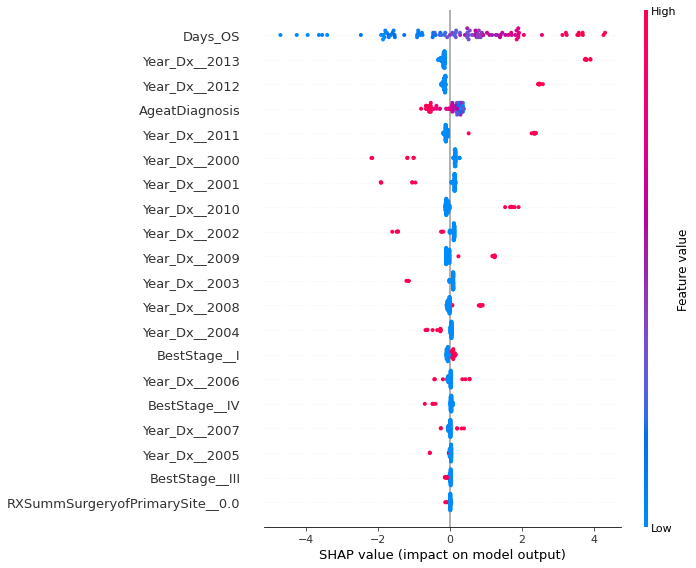

In [ ]:
shap.summary_plot(shap_values, features=observations, feature_names=all_features)

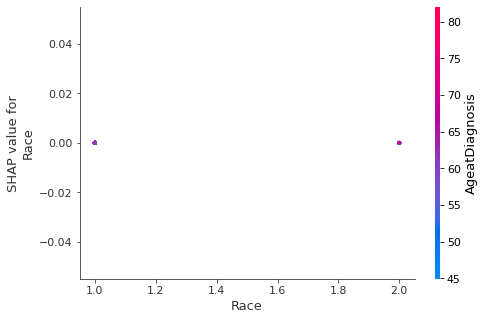

In [ ]:
shap.dependence_plot('Race', shap_values,
                     pd.DataFrame(observations, columns=all_features))

In [ ]:
df2=df1[['Race', 'BestStage', 'VitalStatus', 'Days_OS']]

In [ ]:
pd.pivot_table(df2, values=["VitalStatus",'Days_OS'], index=['Race', 'BestStage'])

Days_OS  VitalStatus
Race BestStage                          
1    0          2779.000000     1.000000
     I          2524.117801     0.795509
     II         2425.227318     0.712951
     III        1897.529691     0.536342
     IV          976.423154     0.253493
     UKW        1434.202312     0.677457
2    I          2312.050000     0.806667
     II         2254.542293     0.694549
     III        1732.228111     0.523041
     IV          792.831224     0.206751
     UKW        1448.761468     0.513761

In [ ]:
df2.groupby(['Race', 'Days_OS']).mean()

VitalStatus
Race Days_OS             
1    1                0.0
     2                0.0
     3                0.0
     4                0.0
     5                0.0
...                   ...
2    5467             1.0
     5472             1.0
     5473             1.0
     5474             1.0
     5476             1.0

[6687 rows x 1 columns]